In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
x_train = np.linspace(-1, 1, 20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
x_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

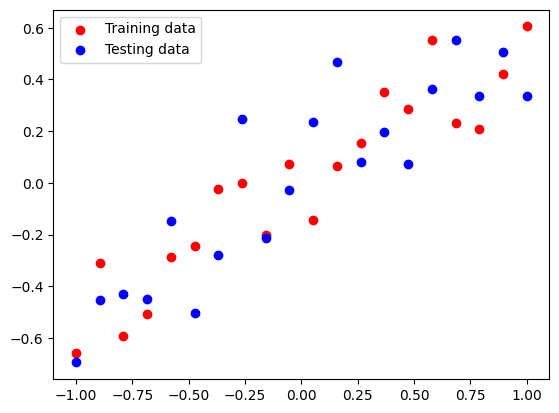

In [7]:
plt.scatter(x_train, y_train, c='red', label='Training data')
plt.scatter(x_test, y_test, c='blue', label='Testing data')
plt.legend()
plt.show()

In [9]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=False)

In [10]:
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print(f"Training error : {train_mse}, Testing error : {test_mse}")

Training error : 0.005194074008613825, Testing error : 0.04675823822617531


In [11]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


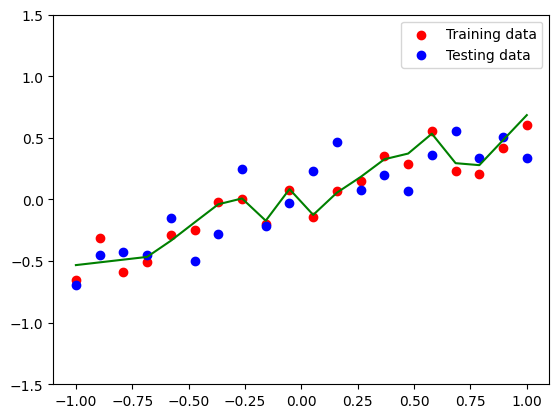

In [13]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Training data')
plt.scatter(x_test, y_test, c='blue', label='Testing data')
plt.plot(x_test, y_pred, c='green')
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

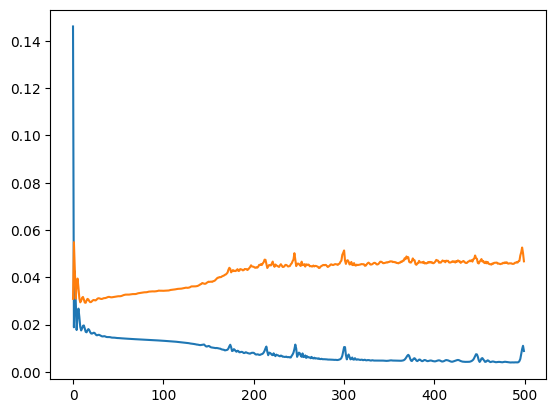

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## As we can cleaerly see above graph, there is clear overfitting occurring

In [22]:
model_2 = Sequential()

model_2.add(Dense(128, activation='relu', input_dim=1))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='linear'))

adam_2 = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam_2, metrics=['mse'])
history_2 = model_2.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=False)

In [23]:
_, train_mse_2 = model_2.evaluate(x_train, y_train, verbose=0)
_, test_mse_2 = model_2.evaluate(x_test, y_test, verbose=0)
print(f"Training error : {train_mse_2}, Testing error : {test_mse_2}")

Training error : 0.016446342691779137, Testing error : 0.03782222419977188


In [24]:
y_pred_2 = model_2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


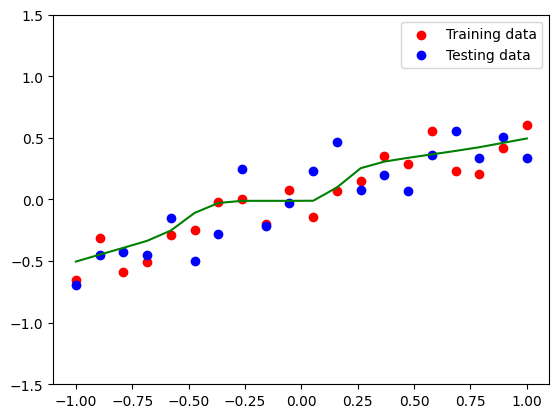

In [25]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Training data')
plt.scatter(x_test, y_test, c='blue', label='Testing data')
plt.plot(x_test, y_pred_2, c='green')
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

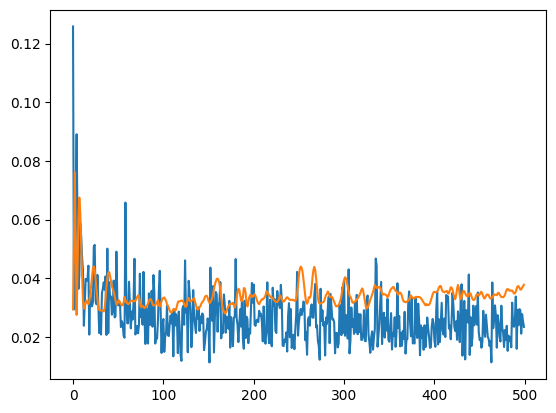

In [26]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])